In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole  # Jupyter上で分子構造表示可能にする

In [2]:
# サンプルSMILESデータ作成
data = {
    "SMILES": [
        "CN(C)C",                  # 3級モノアミン (トリメチルアミン)
        "CCN(CC)CC",               # 3級モノアミン (トリエチルアミン)
        "CCN(C)C1=CC=CC=C1",       # 芳香族置換 3級モノアミン (N,N-ジメチルアニリン)
        "CCN(C)C2=CC=CC3=CC=CC=C23", # カルバゾールを置換基に持つ3級モノアミン
        "NCCN",                    # ジアミン (エチレンジアミン) → 除外
        "C1=CC=NC=C1",             # ピリジン（非アミン窒素のみ）→ 除外
        "C1=CC2=CC=CC=C2N1",       # カルバゾール（非アミン）→ 除外
        "CN",                      # 1級アミン (メチルアミン) → 除外
        "CN(C)C(=O)C",             # アミド（N,N-ジメチルアセトアミド）→ 無視（除外）
        "CC(C)N(C)C"               # 3級モノアミン (tert-ブチルジメチルアミン)
    ]
}

df = pd.DataFrame(data)

In [3]:
# 3級モノアミンかどうかを判定する関数
def is_tertiary_monoamine(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False

    # 3級アミンのSMARTSパターン（窒素に3つの炭素が結合、N原子数は1つのみを想定）
    tertiary_amine = Chem.MolFromSmarts("[NX3]([#6])([#6])[#6]")
    if not mol.HasSubstructMatch(tertiary_amine):
        return False

    # N原子の数を数える（ジアミンは除外）
    n_atoms = [atom for atom in mol.GetAtoms() if atom.GetSymbol() == "N"]
    amine_like_n = 0
    for n in n_atoms:
        # 芳香族NやアミドNを除外、sp3でC3つに結合するNをカウント
        if n.GetIsAromatic():
            continue
        if n.GetDegree() == 3 and all(nb.GetSymbol() == "C" for nb in n.GetNeighbors()):
            amine_like_n += 1

    # モノアミンだけ許可
    return amine_like_n == 1

In [4]:
# フィルタリング
df_filtered = df[df["SMILES"].apply(is_tertiary_monoamine)].reset_index(drop=True)

print("=== 元のデータ ===")
print(df)
print("\n=== 3級モノアミンのみ抽出 ===")
print(df_filtered)

=== 元のデータ ===
                      SMILES
0                     CN(C)C
1                  CCN(CC)CC
2          CCN(C)C1=CC=CC=C1
3  CCN(C)C2=CC=CC3=CC=CC=C23
4                       NCCN
5                C1=CC=NC=C1
6          C1=CC2=CC=CC=C2N1
7                         CN
8                CN(C)C(=O)C
9                 CC(C)N(C)C

=== 3級モノアミンのみ抽出 ===
                      SMILES
0                     CN(C)C
1                  CCN(CC)CC
2          CCN(C)C1=CC=CC=C1
3  CCN(C)C2=CC=CC3=CC=CC=C23
4                CN(C)C(=O)C
5                 CC(C)N(C)C


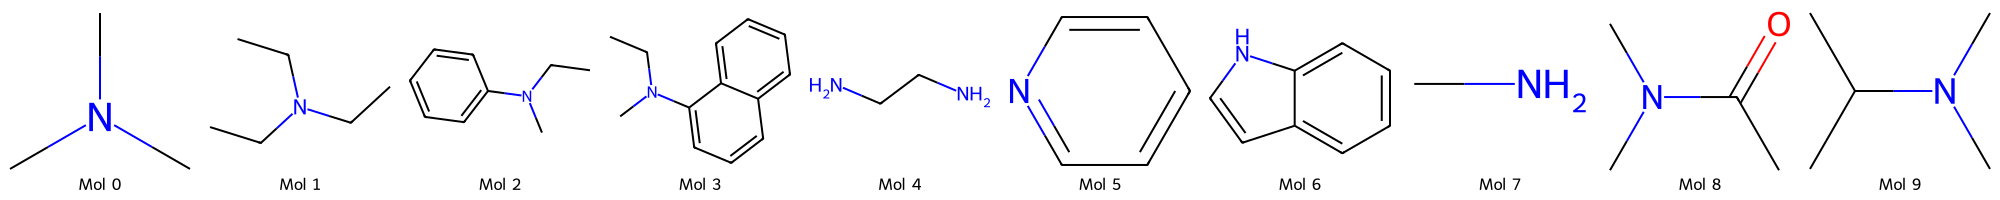

In [ ]:
# --- SMILESからMolオブジェクトに変換 ---
mols = [Chem.MolFromSmiles(smiles) for smiles in df["SMILES"]]

# --- 分子構造をJupyter上で可視化（2D） ---
Draw.MolsToImage(mols, molsPerRow=2, subImgSize=(200,200), legends=[f"Mol {i}" for i in range(len(mols))])

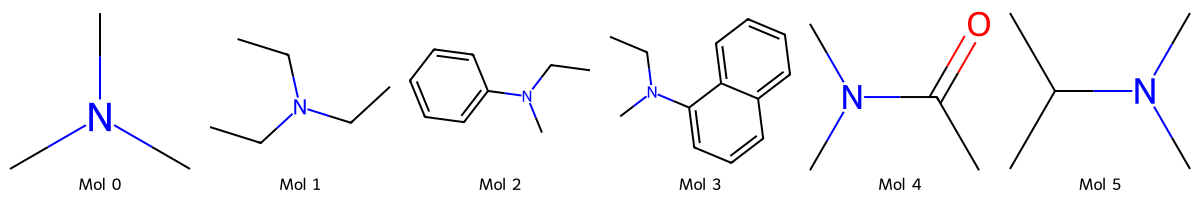

In [10]:
# --- SMILESからMolオブジェクトに変換 ---
mols_filtered = [Chem.MolFromSmiles(smiles) for smiles in df_filtered["SMILES"]]

# --- 分子構造をJupyter上で可視化（2D） ---
Draw.MolsToImage(mols_filtered, molsPerRow=2, subImgSize=(200,200), legends=[f"Mol {i}" for i in range(len(mols))])